In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202443          7   2701      725    4677       4           1   
1     202442          7   2659     1260    4058       4           2   
2     202441          7   2035      381    3689       3           1   
3     202440          7   2125      725    3525       3           1   
4     202439          7   2898     1333    4463       4           2   
5     202438          7    751        0    1513       1           0   
6     202437          7    916       28    1804       1           0   
7     202436          7   2235      870    3600       3           1   
8     202435          7   1620      285    2955       2           0   
9     202434          7   2560      622    4498       4           1   
10    202433          7   1971      536    3406       3           1   
11    202432          7   4399     1944    6854       7           3   
12    202431          7   4500     2213    6787       7           4   
13    202430          7   7004     4278    9730      11           7   
14    202429          7   9270     6303   12237      14          10   
15    202428          7   9364     6498   12230      14          10   
16    202427          7  10247     7090   13404      15          10   
17    202426          7  14368    10399   18337      22          16   
18    202425          7  11174     8039   14309      17          12   
19    202424          7  12621     9357   15885      19          14   
20    202423          7  14657    11339   17975      22          17   
21    202422          7  11628     8361   14895      17          12   
22    202421          7   9701     6851   12551      15          11   
23    202420          7  13661    10209   17113      20          15   
24    202419          7  10083     6413   13753      15           9   
25    202418          7  13438     9514   17362      20          14   
26    202417          7  15303    11219   19387      23          17   
27    202416          7  18138    13540   22736      27          20   
28    202415          7  24929    17315   32543      37          26   
29    202414          7  16181    12544   19818      24          19   
...      ...        ...    ...      ...     ...     ...         ...   
1739  199126          7  17608    11304   23912      31          20   
1740  199125          7  16169    10700   21638      28          18   
1741  199124          7  16171    10071   22271      28          17   
1742  199123          7  11947     7671   16223      21          13   
1743  199122          7  15452     9953   20951      27          17   
1744  199121          7  14903     8975   20831      26          16   
1745  199120          7  19053    12742   25364      34          23   
1746  199119          7  16739    11246   22232      29          19   
1747  199118          7  21385    13882   28888      38          25   
1748  199117          7  13462     8877   18047      24          16   
1749  199116          7  14857    10068   19646      26          18   
1750  199115          7  13975     9781   18169      25          18   
1751  199114          7  12265     7684   16846      22          14   
1752  199113          7   9567     6041   13093      17          11   
1753  199112          7  10864     7331   14397      19          13   
1754  199111          7  15574    11184   19964      27          19   
1755  199110          7  16643    11372   21914      29          20   
1756  199109          7  13741     8780   18702      24          15   
1757  199108          7  13289     8813   17765      23          15   
1758  199107          7  12337     8077   16597      22          15   
1759  199106          7  10877     7013   14741      19          12   
1760  199105          7  10442     6544   14340      18          11   
1761  199104          7   7913     4563   11263      14           8   
1762  199103          7  15387    10484   20290      27          18   
1763  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
data = raw_data.dropna().copy()

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
sorted_data = data.set_index('period').sort_index()

In [8]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

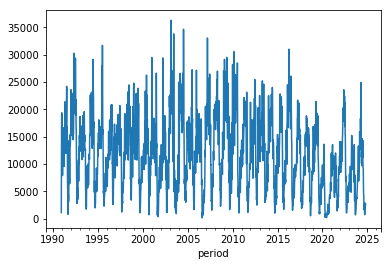

In [9]:
sorted_data['inc'] = pd.to_numeric(sorted_data['inc'], errors='coerce')
sorted_data['inc'].plot()


In [10]:
sorted_data['inc']

period
1990-12-03/1990-12-09     1143
1990-12-10/1990-12-16    11079
1990-12-17/1990-12-23    19080
1990-12-24/1990-12-30    19375
1990-12-31/1991-01-06    15565
1991-01-07/1991-01-13    16277
1991-01-14/1991-01-20    15387
1991-01-21/1991-01-27     7913
1991-01-28/1991-02-03    10442
1991-02-04/1991-02-10    10877
1991-02-11/1991-02-17    12337
1991-02-18/1991-02-24    13289
1991-02-25/1991-03-03    13741
1991-03-04/1991-03-10    16643
1991-03-11/1991-03-17    15574
1991-03-18/1991-03-24    10864
1991-03-25/1991-03-31     9567
1991-04-01/1991-04-07    12265
1991-04-08/1991-04-14    13975
1991-04-15/1991-04-21    14857
1991-04-22/1991-04-28    13462
1991-04-29/1991-05-05    21385
1991-05-06/1991-05-12    16739
1991-05-13/1991-05-19    19053
1991-05-20/1991-05-26    14903
1991-05-27/1991-06-02    15452
1991-06-03/1991-06-09    11947
1991-06-10/1991-06-16    16171
1991-06-17/1991-06-23    16169
1991-06-24/1991-06-30    17608
                         ...  
2024-04-01/2024-04-07    16181
2

In [11]:
first_september_week = [pd.Period(pd.Timestamp(y, 10, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]
first_september_week

[Period('1990-10-01/1990-10-07', 'W-SUN'),
 Period('1991-09-30/1991-10-06', 'W-SUN'),
 Period('1992-09-28/1992-10-04', 'W-SUN'),
 Period('1993-09-27/1993-10-03', 'W-SUN'),
 Period('1994-09-26/1994-10-02', 'W-SUN'),
 Period('1995-09-25/1995-10-01', 'W-SUN'),
 Period('1996-09-30/1996-10-06', 'W-SUN'),
 Period('1997-09-29/1997-10-05', 'W-SUN'),
 Period('1998-09-28/1998-10-04', 'W-SUN'),
 Period('1999-09-27/1999-10-03', 'W-SUN'),
 Period('2000-09-25/2000-10-01', 'W-SUN'),
 Period('2001-10-01/2001-10-07', 'W-SUN'),
 Period('2002-09-30/2002-10-06', 'W-SUN'),
 Period('2003-09-29/2003-10-05', 'W-SUN'),
 Period('2004-09-27/2004-10-03', 'W-SUN'),
 Period('2005-09-26/2005-10-02', 'W-SUN'),
 Period('2006-09-25/2006-10-01', 'W-SUN'),
 Period('2007-10-01/2007-10-07', 'W-SUN'),
 Period('2008-09-29/2008-10-05', 'W-SUN'),
 Period('2009-09-28/2009-10-04', 'W-SUN'),
 Period('2010-09-27/2010-10-03', 'W-SUN'),
 Period('2011-09-26/2011-10-02', 'W-SUN'),
 Period('2012-10-01/2012-10-07', 'W-SUN'),
 Period('20

In [20]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    print(len(one_year))
    if len(one_year) != 43:
        assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

43
52
52
52
52
53
52
52
52
52
53
52
52
52
52
52
53
52
52
52
52
53
52
52
52
52
52
53
52
52
52
52
52


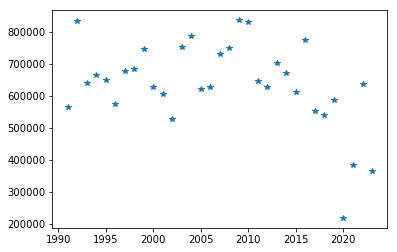

In [21]:
yearly_incidence.plot(style='*')

In [22]:
yearly_incidence.sort_values().idxmax()


2009

In [23]:
yearly_incidence.sort_values()

2020    217605
2023    364553
2021    382779
2002    526035
2018    540799
2017    552105
1991    565956
1996    574093
2019    585143
2001    606520
2015    611634
2005    620796
2006    626180
2012    627384
2000    627405
2022    635251
1993    638384
2011    644660
1995    650679
1994    664684
2014    672401
1997    677145
1998    682638
2013    703305
2007    729321
1999    746617
2008    750410
2003    752007
2016    775321
2004    786328
2010    830938
1992    834566
2009    836245
dtype: int64

In [24]:
yearly_incidence.sort_values().idxmin()

2020